# Predicting Sales Prices

## 1. Loading data into juypter notebook

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Read in the data set
property_df = pd.read_csv('ames.csv')
# Display top 5 observations
property_df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


## 2. Data Cleaning and Preprocessing

In [4]:
# First select columns of interest
reduced_df = property_df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']]

# Display top 5 observations
reduced_df.head()

,Gr_Liv_Area,Garage_Area,Sale_Price
0,1656,528,215000
1,896,730,105000
2,1329,312,172000
3,2110,522,244000
4,1629,482,189900


In [5]:
# Check if there are null values or empty spaces
null_count = reduced_df.isnull().sum()
print(f'Null values = \n{null_count}')

Null values = 
Gr_Liv_Area    0
Garage_Area    0
Sale_Price     0
dtype: int64


In [6]:
# Check if the dataset has negative values
negative_values = reduced_df[(reduced_df < 0).all(1)]
print(f'Negative values found: \n {negative_values}')

Negative values found: 
 Empty DataFrame
Columns: [Gr_Liv_Area, Garage_Area, Sale_Price]
Index: []


It is observed that the data has no missing records or negative values for the columns of interest

## 3. Observe the Relationship Between the Independent Variables and the Dependent Variable.

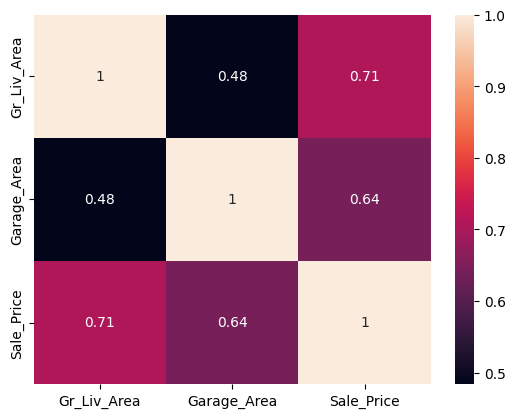

In [7]:
# Plot the correlation matrix to visualize the data
plt.figure()
corr_coeff_matrix = reduced_df.corr()   # Calculate corellation coefficient
sns.heatmap(corr_coeff_matrix, annot=True)
plt.show()
plt.close()

Both the Ground living area and the size of the garage have a strong correlation or relationship with the property sale price. The ground living area shows a higher impact on the sale price of the property as compared to the garage size. 

In [8]:
# Split the independent variables from the dependent variable
X = reduced_df.iloc[:, [0, 1]].values  # Independent variables Ground living area and the size of the garage
Y = reduced_df.iloc[:, 2].values       # dependent variable sale price

# Reshape X and Y to the (-1, 1) range
X = X.reshape(-1, X.shape[1])
Y = Y.reshape(-1, 1)

After seperating the independent and dependend variables, we can visualize the data to see the relationship.

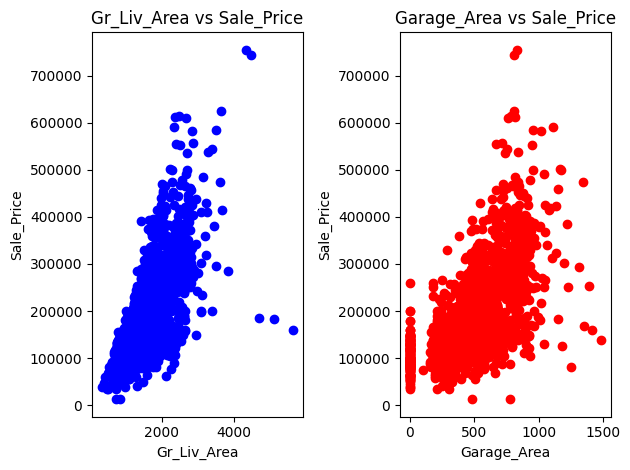

In [9]:
# Plot the first independent variable against Y
plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:, 0], Y, color='blue')
plt.xlabel('Gr_Liv_Area')
plt.ylabel('Sale_Price')
plt.title('Gr_Liv_Area vs Sale_Price')

# Plot the second independent variable against Y
plt.subplot(1,2,2)
plt.scatter(X[:, 1], Y, color='Red')
plt.xlabel('Garage_Area')
plt.ylabel('Sale_Price')
plt.title('Garage_Area vs Sale_Price')

plt.tight_layout()
plt.show()
plt.close()


Based on the observation of the plotted graphs, the ground living area has a strong corellation with the sale price as compared to the garage area. However, both the ground living area and garage area have a positive corellation. Meaning that as they increase, the sale price of the property increases.

## 4. Building a Linear Regression Model 

In [17]:
# Create a training and test set with a 75:25 split ratio
rseed = 0       # To get the same result, we use the random seed
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 2) (2197, 1)
Test data: (733, 2) (733, 1)


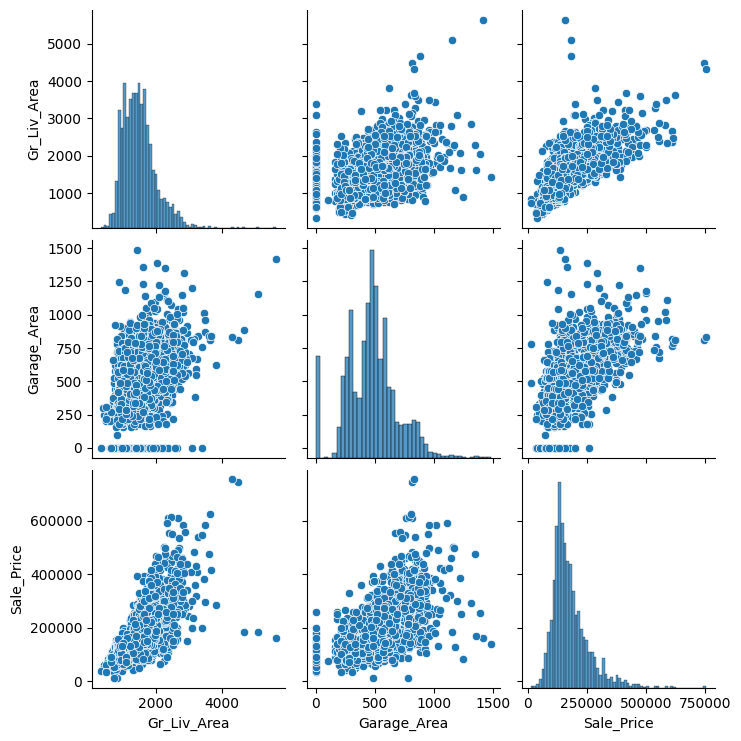

In [11]:
# Plot the distribution of the data
sns.pairplot(data=reduced_df)

The dataset has outliers, thus, using feature scaling will ensure that the data is on the same scale.
In this case, Standardization should be used since we will be using a linear regression model [Ref:Chatgpt,https://chatgpt.com/c/355b2cf1-335d-42ab-844a-f1d9a7b1548b]. 

Furthermore, The data seems to be following the Gaussian (or normal) distribution

In [12]:
# Creater a scaler and fit on training data for X variable
scaler_x = StandardScaler()
scaler_x.fit(X_train)

# Apply the scaler on train and test data for X variable
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

# Creater a scaler and fit on training data for Y variable
scaler_y = StandardScaler()
scaler_y.fit(y_train)

# Apply the scaler on train and test data for Y variable
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

In [13]:
# Fit the model on the training data and make predictions
property_model = LinearRegression()
property_model.fit(X_train, y_train)
y_pred = property_model.predict(X_test)


In [14]:
# Print the model intercept and coefficients
print(f"Intercept = \n {property_model.intercept_}")
print(f"Coefficient = \n {property_model.coef_}")

Intercept = 
 [-1.57900303e-16]
Coefficient = 
 [[0.52032083 0.38389789]]


In [15]:
# Generate predictions for the test set
y_pred[0:5]

array([[ 0.4589492 ],
       [-0.58838476],
       [ 1.00541711],
       [-0.76522902],
       [-0.48823957]])

In [18]:
# Evaluate the model using the rrot mean squared error (RMSE)
# calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print Root Mean Square Error
print(f"RMSE = {rmse}")

RMSE = 198600.95058883863


In [ ]:
# Generate a plot

In [ ]:
# Print the coefficients

**Interpret coefficients in the context of the prediction:**
[Answer here]

**Summarise findings**
[Answer here]